
# Video Ranking & Recommendation System

This notebook uses a real dataset of **YouTube trending videos** to:
- Rank videos by engagement metrics (views, likes, comments)
- Build a content-based recommender using metadata (title, description, tags)
- Show similar videos for a given video
- Visualize top-ranked videos


In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
url = 'https://raw.githubusercontent.com/ZhaoyiW/YouTube-Trending-Video-Analysis/main/USvideos.csv'
df = pd.read_csv(url, parse_dates=['publish_time'])
print("Dataset loaded, shape:", df.shape)
df.head()

Dataset loaded, shape: (40949, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [17]:
df = df[['video_id','title','description','tags','views','likes','comment_count']].copy()
df = df.drop_duplicates(subset=['video_id']).reset_index(drop=True)
df['tags'] = df['tags'].fillna('').astype(str)

In [18]:
df['views_norm'] = (df['views'] - df['views'].min()) / (df['views'].max() - df['views'].min())
df['likes_norm'] = (df['likes'] - df['likes'].min()) / (df['likes'].max() - df['likes'].min())
df['comments_norm'] = (df['comment_count'] - df['comment_count'].min()) / (df['comment_count'].max() - df['comment_count'].min())

# Weighted score: views 0.5, likes 0.3, comments 0.2
df['ranking_score'] = 0.5*df['views_norm'] + 0.3*df['likes_norm'] + 0.2*df['comments_norm']

# Sort by ranking score
df_sorted = df.sort_values('ranking_score', ascending=False).reset_index(drop=True)
print("Top 10 Videos by Ranking Score:")
display(df_sorted[['video_id','title','ranking_score']].head(10))

Top 10 Videos by Ranking Score:


,video_id,title,ranking_score
0,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,0.895041
1,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,0.589586
2,-BQJo3vK8O8,Maluma - El Préstamo (Official Video),0.555050
3,i0p1bmr0EmE,TWICE What is Love? M/V,0.543620
4,2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),0.495637
5,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,0.476154
6,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,0.470718
7,kTlv5_Bs8aw,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,0.410743
8,QwZT7T-TXT0,So Sorry.,0.401951
9,u9Mv98Gr5pY,VENOM - Official Trailer (HD),0.380926


/tmp/ipython-input-2718860960.py:6: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2718860960.py:6: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2718860960.py:6: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2718860960.py:6: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2718860960.py:6: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Gly

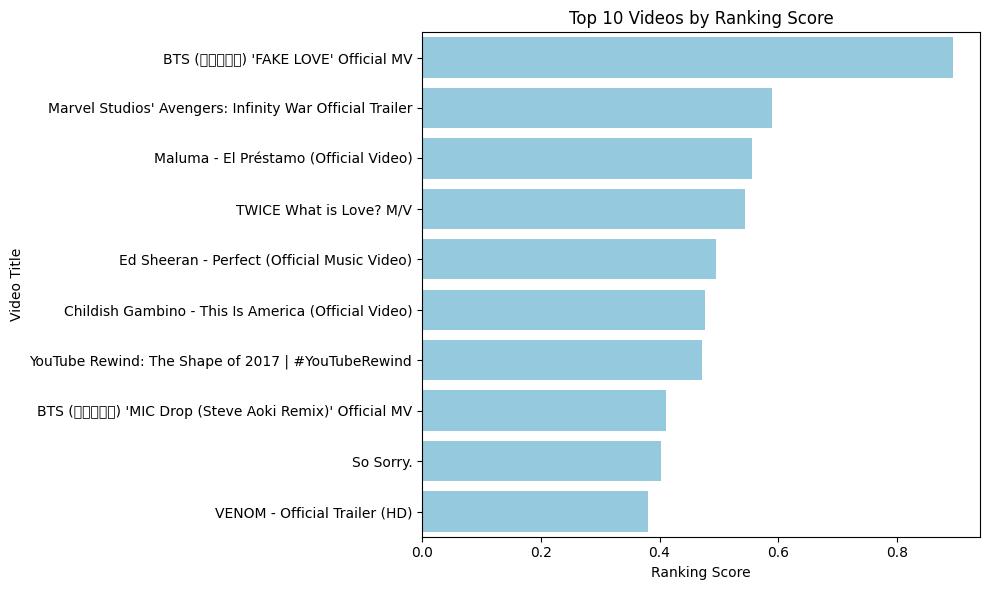

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_sorted.head(10), x='ranking_score', y='title', color='skyblue')
plt.title("Top 10 Videos by Ranking Score")
plt.xlabel("Ranking Score")
plt.ylabel("Video Title")
plt.tight_layout()
plt.show()


In [20]:
df['content_text'] = df['title'].fillna('') + ' ' + df['description'].fillna('') + ' ' + df['tags'].fillna('')
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['content_text'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_df = pd.DataFrame(cosine_sim, index=df['video_id'], columns=df['video_id'])

def recommend_similar(video_id, top_n=5):
    """Return top_n similar videos for a given video_id"""
    if video_id not in cosine_df.index:
        print("Video ID not found.")
        return None
    sim_scores = cosine_df.loc[video_id].sort_values(ascending=False)
    sim_scores = sim_scores.drop(video_id, errors='ignore')
    top = sim_scores.head(top_n).reset_index()
    top.columns = ['video_id', 'similarity']
    recs = top.merge(df, on='video_id')[['video_id','title','ranking_score','similarity']]
    return recs


In [21]:
top_video_id = df_sorted.loc[0, 'video_id']
print("Top-ranked video:", df_sorted.loc[0,'title'])
print("\nRecommended similar videos:")
display(recommend_similar(top_video_id, top_n=5))

Top-ranked video: BTS (방탄소년단) 'FAKE LOVE' Official MV

Recommended similar videos:


,video_id,title,ranking_score,similarity
0,D_6QmL6rExk,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...,0.208656,0.945271
1,p8npDG2ulKQ,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,0.339245,0.903534
2,2tDKp41nrw8,BTS (방탄소년단) 'FAKE LOVE' Official Teaser 2,0.197092,0.780308
3,kX0vO4vlJuU,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...,0.248394,0.771071
4,nQySbNGu4g0,[CHOREOGRAPHY] BTS (방탄소년단) 'FAKE LOVE' Dance P...,0.123944,0.751175
